# Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error

from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.callbacks import ModelCheckpoint

In [2]:
SEED = 42
plt.rcParams["font.family"] = "serif"

# Temp functions

In [3]:
# def setDataTypes(df):
#     df['latitude'] = df['latitude'].astype('float64')
#     df['longitude'] = df['longitude'].astype('float64')
#     df['heading'] = df['heading'].astype('float64')
#     df['speed'] = df['speed'].astype('float64')
#     df['ais_draught'] = df['ais_draught'].astype('float64')
#     return df

# Import data

## Importing main data for year 22-23

In [4]:
data = pd.read_csv('allData.csv')
data.head()

,imo,record_time,latitude,longitude,destination,eta,heading,speed,ais_status,ais_draught,ais_source
0,1021374,03-Jun-2014 22:04:22,-33.040533,-71.614350,NaN,01-Jan-1970 00:00:00,26,0.4,UnderwaySailing,0.0,VesselTracker
1,1021374,13-Jun-2014 01:27:27,-33.039900,-71.614700,NaN,01-Jan-1970 00:00:00,73,0.1,UnderwaySailing,0.0,VesselTracker
2,1021374,19-Jun-2014 13:27:09,-33.036000,-71.626217,NaN,01-Jan-1970 00:00:00,195,0.0,UnderwaySailing,0.0,VesselTracker
3,1021374,20-Aug-2014 19:08:23,-33.039517,-71.618033,NaN,01-Jan-1970 00:00:00,50,0.0,UnderwaySailing,0.0,VesselTracker
4,1021374,15-Oct-2014 21:18:53,-32.942750,-71.600283,NaN,01-Jan-1970 00:00:00,332,7.9,Underway Using Engine,0.0,VesselTracker


In [5]:
data.tail()

,imo,record_time,latitude,longitude,destination,eta,heading,speed,ais_status,ais_draught,ais_source
16371355,9991680,11-Nov-2023 16:14:37,29.128447,122.654187,HUANGJHOU,18-Aug-2023 12:00:00,200,9.6,Underway Using Engine,6.9,VesselTracker
16371356,9991680,12-Nov-2023 23:50:03,24.793747,119.407293,FANGCHENG,16-Nov-2023 14:00:00,225,10.0,Underway Using Engine,13.6,VesselTracker
16371357,9991680,13-Nov-2023 18:42:08,22.756812,116.962507,FANGCHENG,16-Nov-2023 14:00:00,241,10.3,Underway Using Engine,13.6,VesselTracker
16371358,9991680,15-Nov-2023 23:14:55,21.025697,108.760080,FANGCHENG,16-Nov-2023 13:00:00,311,6.6,Underway Using Engine,13.6,VesselTracker
16371359,9991680,16-Nov-2023 18:22:18,21.360385,108.438887,FANGCHENG,16-Nov-2023 12:00:00,312,0.0,At Anchor,13.6,VesselTracker


In [6]:
data.describe()

,imo,latitude,longitude,heading,speed,ais_draught
count,1.637136e+07,1.637136e+07,1.637136e+07,1.637136e+07,1.637136e+07,1.637136e+07
mean,9.466859e+06,1.612413e+01,5.848565e+01,1.803293e+02,6.996988e+00,9.991703e+00
std,2.893380e+05,2.466797e+01,7.565382e+01,1.125145e+02,5.813380e+00,3.504490e+00
min,1.021374e+06,-7.722692e+01,-1.799999e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,9.317779e+06,1.165421e+00,5.519551e+00,8.400000e+01,5.000000e-01,7.100000e+00
50%,9.505467e+06,2.182914e+01,8.713733e+01,1.795000e+02,9.700000e+00,9.600000e+00
75%,9.638862e+06,3.570410e+01,1.201229e+02,2.700000e+02,1.190000e+01,1.230000e+01
max,9.991680e+06,8.469199e+01,1.799999e+02,5.110000e+02,1.023000e+02,2.550000e+01


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16371360 entries, 0 to 16371359
Data columns (total 11 columns):
 #   Column       Dtype  
---  ------       -----  
 0   imo          int64  
 1   record_time  object 
 2   latitude     float64
 3   longitude    float64
 4   destination  object 
 5   eta          object 
 6   heading      int64  
 7   speed        float64
 8   ais_status   object 
 9   ais_draught  float64
 10  ais_source   object 
dtypes: float64(4), int64(2), object(5)
memory usage: 1.3+ GB


In [8]:
for i in range(len(data.columns)):
    print(i+1,'-',data.columns[i],'-',data[data.columns[i]].dtype)

1 - imo - int64
2 - record_time - object
3 - latitude - float64
4 - longitude - float64
5 - destination - object
6 - eta - object
7 - heading - int64
8 - speed - float64
9 - ais_status - object
10 - ais_draught - float64
11 - ais_source - object


In [9]:
data.columns

Index(['imo', 'record_time', 'latitude', 'longitude', 'destination', 'eta',
       'heading', 'speed', 'ais_status', 'ais_draught', 'ais_source'],
      dtype='object')

In [10]:
len(data['imo'])


16371360

In [11]:
len(data['imo'].unique())

13970

In [12]:
# data = data[data['ais_status'] == 'Underway Using Engine'].reset_index().drop('index', axis = 1)
# data.head()

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16371360 entries, 0 to 16371359
Data columns (total 11 columns):
 #   Column       Dtype  
---  ------       -----  
 0   imo          int64  
 1   record_time  object 
 2   latitude     float64
 3   longitude    float64
 4   destination  object 
 5   eta          object 
 6   heading      int64  
 7   speed        float64
 8   ais_status   object 
 9   ais_draught  float64
 10  ais_source   object 
dtypes: float64(4), int64(2), object(5)
memory usage: 1.3+ GB


In [14]:
# data = data[data['imo']== 5103974].reset_index().drop('index', axis = 1)
# data

## Dropping irrelevant columns

In [15]:
data.drop(['record_time', 'destination', 'eta', 'ais_status', 'ais_draught', 'ais_source'], axis=1, inplace=True)

In [16]:
data.columns

Index(['imo', 'latitude', 'longitude', 'heading', 'speed'], dtype='object')

In [17]:
len(pd.unique(data.imo.values))

13970

In [18]:
len(data.imo.values)

16371360

## Creating separate dataset for unique imo

In [19]:
unique_values = data['imo'].unique()
dfs = {value: data[data['imo'] == value] for value in unique_values}

In [20]:
print(dfs[unique_values[0]])

             imo   latitude  longitude  heading  speed
0        1021374 -33.040533 -71.614350       26    0.4
1        1021374 -33.039900 -71.614700       73    0.1
2        1021374 -33.036000 -71.626217      195    0.0
3        1021374 -33.039517 -71.618033       50    0.0
4        1021374 -32.942750 -71.600283      332    7.9
5        1021374 -32.988550 -71.608900      355    6.4
1448030  1021374 -33.036267 -71.625450      323    0.0
1448031  1021374 -33.040667 -71.613550        6    0.1
2929597  1021374 -33.039853 -71.616457      511    0.1
2929598  1021374 -32.961787 -71.604818      511    7.0
2929599  1021374 -33.041068 -71.614565      346    0.1
4426736  1021374 -33.039397 -71.612720      343    0.0
4426737  1021374 -41.515962 -73.006362      511    0.1
4426738  1021374 -33.037753 -71.616327      511    0.0
4426739  1021374 -41.489373 -72.940447      511    0.2
5983772  1021374 -41.488728 -72.944832      511    0.1
5983773  1021374 -41.530707 -72.915532      511    7.4
5983774  1

In [21]:
# dfs[unique_values[11670]]

In [22]:
len(dfs), len(dfs[unique_values[5]]), len(dfs.keys()), len(dfs.values()), 11687*11687 , 2057817

(13970, 1, 13970, 13970, 136585969, 2057817)

In [23]:
unique_imo_rowcount_list = []
unique_imo_list = []

for imo, imo_df in dfs.items():
    unique_imo_list.append(imo)
    unique_imo_rowcount_list.append(len(imo_df.index.values))

In [24]:
sum(unique_imo_rowcount_list), len(unique_imo_rowcount_list)

(16371360, 13970)

## Visualization of data availability

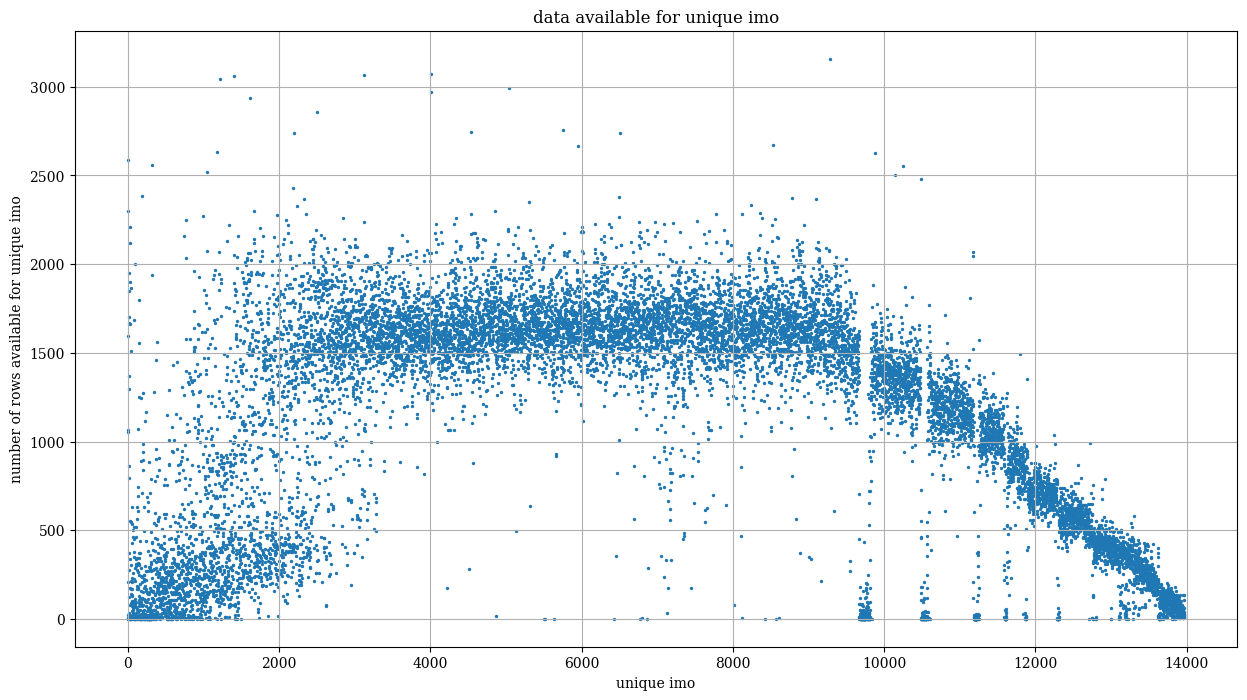

In [25]:
plt.figure(figsize=[15,8])
plt.title('data available for unique imo')
plt.scatter(np.arange(len(unique_imo_rowcount_list)), unique_imo_rowcount_list, s=2)
plt.xlabel('unique imo')
plt.ylabel('number of rows available for unique imo')
plt.grid()
plt.show()

## Visualization of all features for individual imo

In [26]:
data.columns


Index(['imo', 'latitude', 'longitude', 'heading', 'speed'], dtype='object')

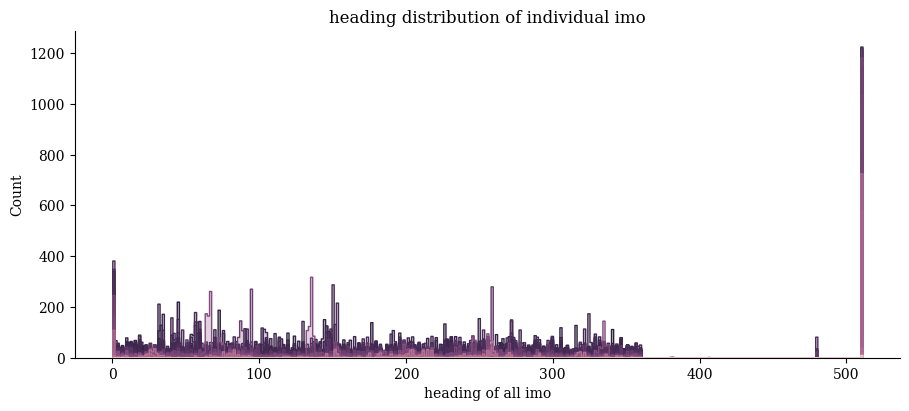

In [27]:
sns.displot(data, x="heading", hue="imo", element="step", height=4, aspect=2.3, legend=False)
plt.xlabel("heading of all imo")
plt.title("heading distribution of individual imo")
plt.show()

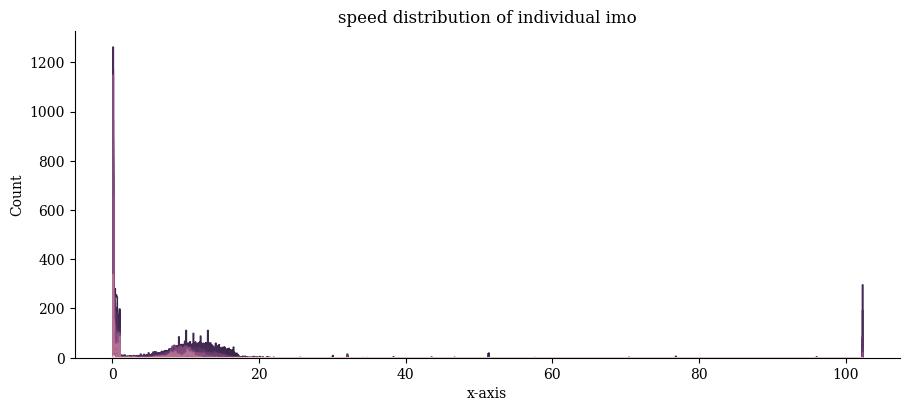

In [28]:
sns.displot(data, x="speed", hue="imo", element="step", height=4, aspect=2.3, legend=False)
plt.xlabel("x-axis")
plt.title("speed distribution of individual imo")
plt.show()

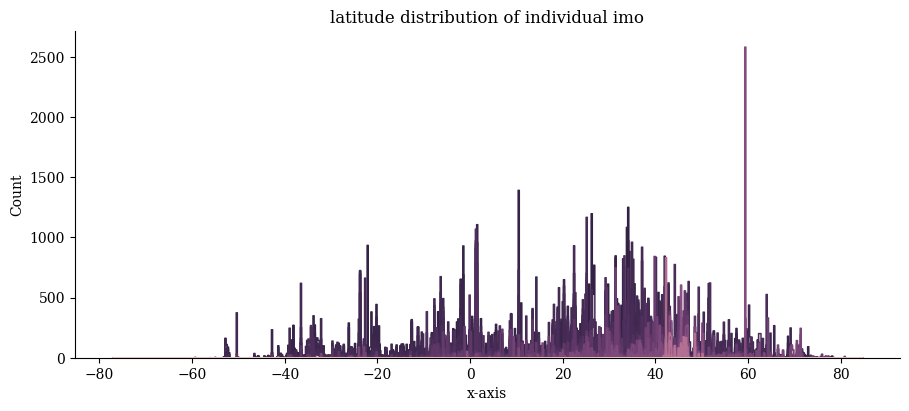

In [29]:
sns.displot(data, x="latitude", hue="imo", element="step", height=4, aspect=2.3, legend=False)
plt.xlabel("x-axis")
plt.title("latitude distribution of individual imo")
plt.show()

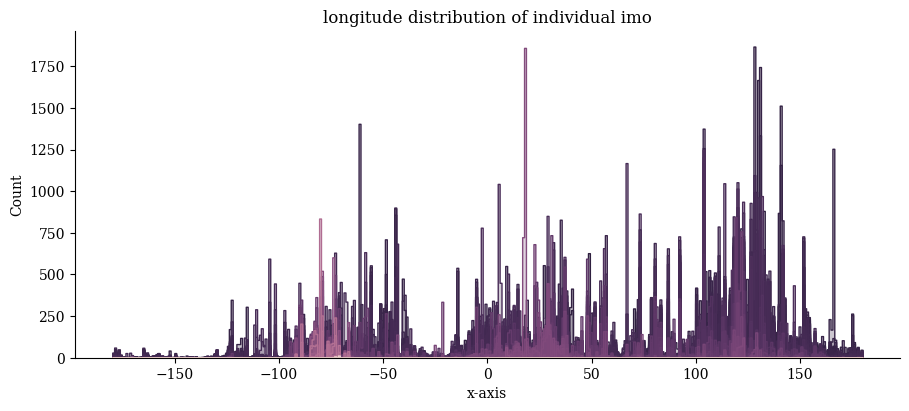

In [30]:
sns.displot(data, x="longitude", hue="imo", element="step", height=4, aspect=2.3, legend=False)
plt.xlabel("x-axis")
plt.title("longitude distribution of individual imo")
plt.show()

In [31]:
print("zero vals", len(data[data['speed']==0].values), "\ntotal vals",len(data.index.values), "\nmore than zero vals",len(data.index.values)-len(data[data['speed']==0].values))

zero vals 1255853 
total vals 16371360 
more than zero vals 15115507


In [32]:
#len(set(data[data['speed']>25]['imo'].values))

In [33]:
#set(data[data['speed']>25]['imo'].values)

In [34]:
#data[data['speed']>25]

## Feature Scaling

In [35]:
# feature scaling step
"""
standardscaler for latitude and longitude
robustscaler for speed
minmaxscaler for heading

visualize all four features after scaling like before
"""

'\nstandardscaler for latitude and longitude\nrobustscaler for speed\nminmaxscaler for heading\n\nvisualize all four features after scaling like before\n'

In [36]:
data['latitude']

0          -33.040533
1          -33.039900
2          -33.036000
3          -33.039517
4          -32.942750
              ...    
16371355    29.128447
16371356    24.793747
16371357    22.756812
16371358    21.025697
16371359    21.360385
Name: latitude, Length: 16371360, dtype: float64

In [37]:
scaler = StandardScaler()
model = scaler.fit(data[['latitude']])
scaledLatitude = model.transform(data[['latitude']])
scaledLatitude = np.ravel(scaledLatitude)


In [38]:
# a = scaledLatitude
# b = np.ravel(a)
# print(b.ndim)


In [39]:
scaler = StandardScaler()
model = scaler.fit(data[['longitude']])
scaledLongitude = model.transform(data[['longitude']])
scaledLongitude = np.ravel(scaledLongitude)

In [40]:
minMaxScaler = MinMaxScaler()
model = minMaxScaler.fit(data[['heading']])
minMaxHeading =  minMaxScaler.transform(data[['heading']])
minMaxHeading = np.ravel(minMaxHeading)

In [41]:
scaler = RobustScaler().fit(data[['speed']])
roboustScaledSpeed = scaler.transform(data[['speed']])
roboustScaledSpeed = np.ravel(roboustScaledSpeed)

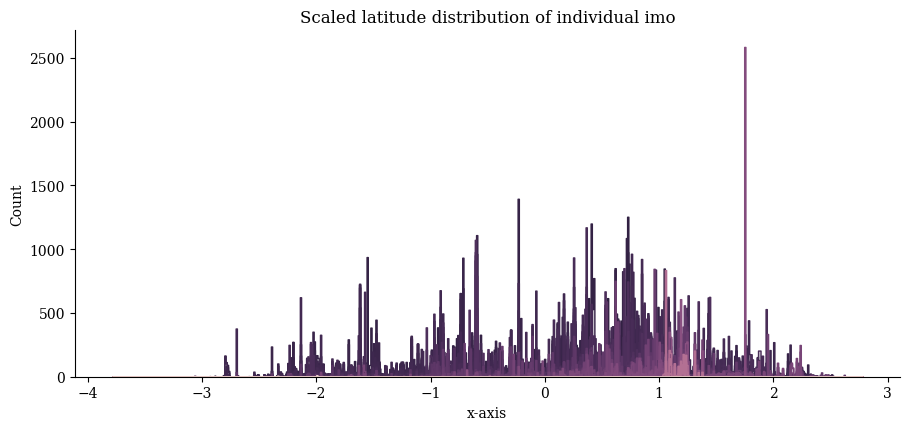

In [42]:
sns.displot(data, x= scaledLatitude, hue="imo", element="step", height=4, aspect=2.3, legend=False)
plt.xlabel("x-axis")
plt.title("Scaled latitude distribution of individual imo")
plt.show()

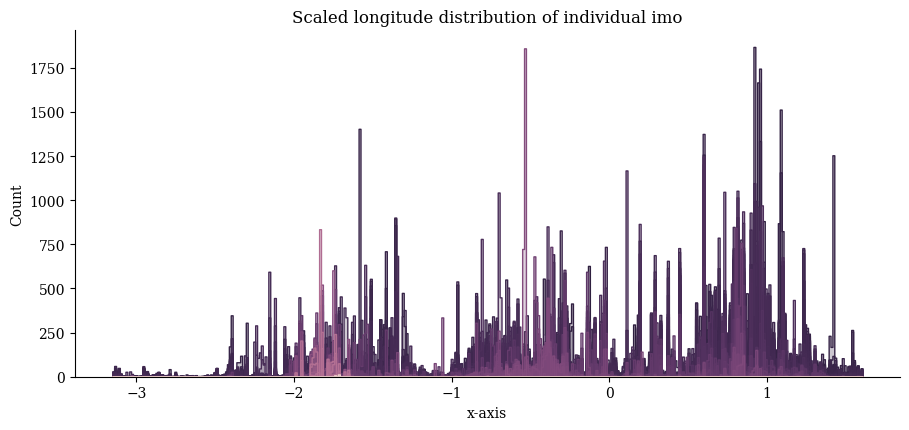

In [43]:
sns.displot(data, x= scaledLongitude, hue="imo", element="step", height=4, aspect=2.3, legend=False)
plt.xlabel("x-axis")
plt.title("Scaled longitude distribution of individual imo")
plt.show()

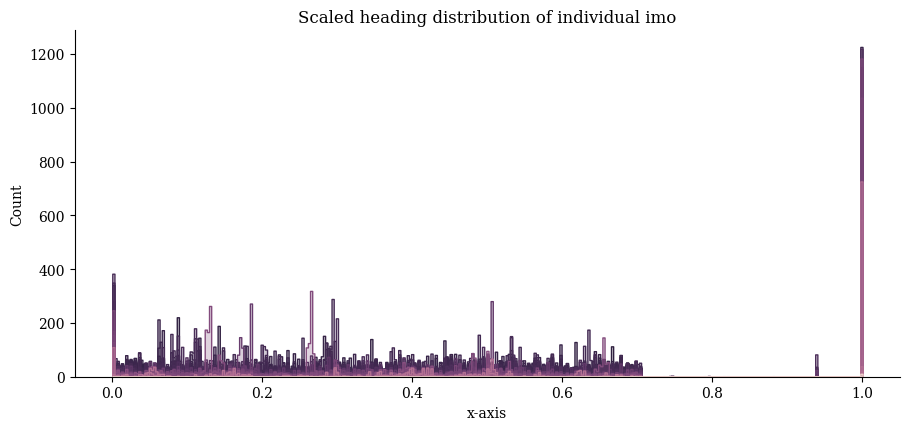

In [44]:
sns.displot(data, x= minMaxHeading, hue="imo", element="step", height=4, aspect=2.3, legend=False)
plt.xlabel("x-axis")
plt.title("Scaled heading distribution of individual imo")
plt.show()

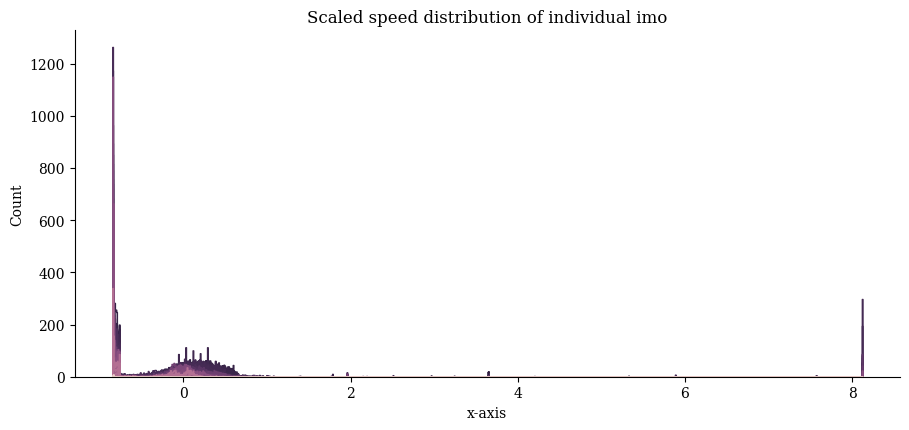

In [45]:
sns.displot(data, x= roboustScaledSpeed, hue="imo", element="step", height=4, aspect=2.3, legend=False)
plt.xlabel("x-axis")
plt.title("Scaled speed distribution of individual imo")
plt.show()

## Data preprocessing for LSTM model

In [46]:
# gorupedData = data.groupby('imo').count()
# maxRow = gorupedData[gorupedData['latitude'] == gorupedData['latitude'].max()]
# imo = maxRow.index.values[0]

In [47]:
# modelData = data[data['imo'] == imo]


In [48]:
# uniqueLatitude = pd.unique(data['latitude'])
# len(uniqueLatitude)


In [49]:
# uniqueLongitude = pd.unique(data['longitude'])
# len(uniqueLongitude)

In [50]:
# uniqueHeading = pd.unique(data['heading'])
# len(uniqueHeading)

In [51]:
scaler = StandardScaler()
# scaler = scaler.fit(data[['latitude', 'longitude', 'heading', 'speed']])
# scaledData = scaler.transform(data[['latitude', 'longitude', 'heading', 'speed']])
scaler = scaler.fit(data[['latitude', 'longitude']])
scaledData = scaler.transform(data[['latitude', 'longitude']])
len(scaledData)


16371360

### Divide data into train and test set

In [52]:
# trainingSize = int(len(scaledData)*0.65)
# testSize = len(scaledData) - trainingSize
# trainData = scaledData[0:trainingSize, :]
# testData = scaledData[trainingSize:len(scaledData), :]
# testData.shape

In [53]:
def createDataset(dataSet, timeStep):
    dataX, dataY = [], []
    for i in range(len(dataSet) - timeStep -1):
        dataX.append(dataSet[i:(i+timeStep), :])
        dataY.append(dataSet[i + timeStep, :])
    return np.array(dataX), np.array(dataY)

In [54]:
# timeStep = 1
# X_train, y_train = createDataset(trainData, timeStep)
# X_test, y_test = createDataset(testData, timeStep)
# print(y_train.shape)
# print(y_test.shape)

In [55]:
uniqueImo = pd.unique(data['imo'])
scaler = StandardScaler()
timeStep = 1
X_trainData = []
y_trainData = []
X_testData = []
y_testData = []
for i in range(len(uniqueImo)):
    imoData = data[data['imo'] == uniqueImo[i]]
    scaler = scaler.fit(imoData[['latitude', 'longitude']])
    scaledData = scaler.transform(imoData[['latitude', 'longitude']])
    trainingSize = int(len(scaledData)*0.65)
    testSize = len(scaledData) - trainingSize
    trainData = scaledData[0:trainingSize, :]
    testData = scaledData[trainingSize:len(scaledData), :]
    X_train, y_train = createDataset(trainData, timeStep)
    X_test, y_test = createDataset(testData, timeStep)
    if len(X_train) != 0:
        X_trainData.append(X_train)
    if len(y_train) != 0:
        y_trainData.append(y_train)
    if len(X_test) != 0:
        X_testData.append(X_test)
    if len(y_test) != 0:
        y_testData.append(y_test)

In [56]:
X_trainData = np.vstack(X_trainData)
y_trainData = np.vstack(y_trainData)

X_testData = np.vstack(X_testData)
y_testData = np.vstack(y_testData)


### Reshape input to be [sample, timeStep, features] which is required for LSTM

In [57]:
X_testData.shape

(5708995, 1, 2)

## LSTM training and validation

### Define LSTM architecture

In [58]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_trainData.shape[1], X_trainData.shape[2])))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(20))
model.add(Dense(2))

### Compile the model

In [59]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics = ['accuracy'])

In [60]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 1, 50)             10600     
                                                                 
 lstm_1 (LSTM)               (None, 1, 50)             20200     
                                                                 
 lstm_2 (LSTM)               (None, 20)                5680      
                                                                 
 dense (Dense)               (None, 2)                 42        
                                                                 
Total params: 36522 (142.66 KB)
Trainable params: 36522 (142.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Train the model with checkpoints and history

In [61]:
#checkpoint = ModelCheckpoint("model_weights.h5", save_best_only=True, save_weights_only=True)
history = model.fit(X_trainData, y_trainData, validation_data = (X_testData, y_testData), epochs= 20, batch_size=64)

Epoch 1/20
165739/165739 [==============================] - 1191s 7ms/step - loss: 0.1259 - accuracy: 0.9254 - val_loss: 0.1061 - val_accuracy: 0.9319
Epoch 2/20
165739/165739 [==============================] - 1254s 8ms/step - loss: 0.1244 - accuracy: 0.9263 - val_loss: 0.1062 - val_accuracy: 0.9302
Epoch 3/20
165739/165739 [==============================] - 1052s 6ms/step - loss: 0.1241 - accuracy: 0.9266 - val_loss: 0.1059 - val_accuracy: 0.9313
Epoch 4/20
165739/165739 [==============================] - 1159s 7ms/step - loss: 0.1240 - accuracy: 0.9268 - val_loss: 0.1056 - val_accuracy: 0.9315
Epoch 5/20
165739/165739 [==============================] - 1412s 9ms/step - loss: 0.1239 - accuracy: 0.9270 - val_loss: 0.1058 - val_accuracy: 0.9288
Epoch 6/20
165739/165739 [==============================] - 2088s 13ms/step - loss: 0.1238 - accuracy: 0.9271 - val_loss: 0.1059 - val_accuracy: 0.9299
Epoch 7/20
165739/165739 [==============================] - 2232s 13ms/step - loss: 0.1237 - 

### Plot training history

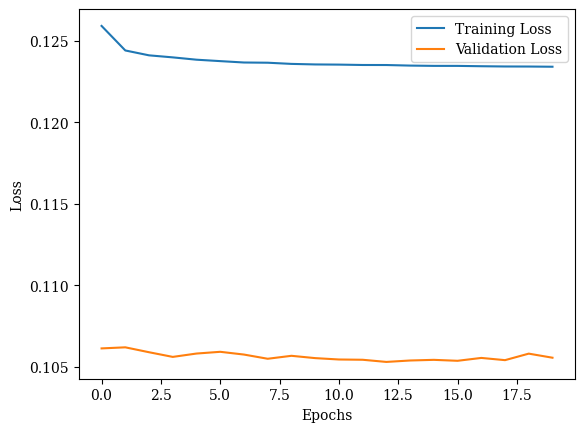

In [62]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Model prediction on the test dataset

In [63]:
# y_pred = model.predict(X_test)
trainPredict = model.predict(X_train)
testPredict = model.predict(X_test)
testPredict.shape

2/2 [==============================] - 0s 4ms/step


(46, 2)

In [64]:
# inverse_scaled_date = scaler.inverse_transform(scaledData)
# plt.scatter(inverse_scaled_date[:,0], inverse_scaled_date[:,1])
# #plt.scatter(testData[:,0], testData[:,1])

In [65]:
#pip install --trusted-host pypi.org --trusted-host files.pythonhosted.org Cartopy

In [66]:
import cartopy.crs as ccrs

In [67]:
# fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()})
# ax.set_title('Latitude and longitude plot with cartopy')
# ax.plot(scaledData[:, 0], scaledData[:, 1], color = 'blue', marker = 'o', transform = ccrs.PlateCarree())
# ax.plot(testPredict[:, 0], testPredict[:, 1], color = 'red', marker = '*', transform = ccrs.PlateCarree())
# plt.show()

### Calculate evaluation metrics

In [68]:
r2ScoreTrain =  r2_score(y_train, trainPredict)
r2ScoreTrain

0.6938602248870827

In [69]:
r2ScoreTest =  r2_score(y_test, testPredict)
r2ScoreTest

0.5826524742765431

In [70]:
mseTrain = mean_squared_error(y_train, trainPredict)
mseTest = mean_squared_error(y_test, testPredict)
# mae = mean_absolute_error(y_test, y_pred)
# mape = mean_absolute_percentage_error(y_test, y_pred)
import math
# print("Test Metrics:")
# print("R2 Score:", r2)
print("Mean Squared Error Train Set:", math.sqrt(mseTrain))
print("Mean Squared Error Test Set:", math.sqrt(mseTest))
# print("Mean Absolute Error:", mae)
# print("Mean Absolute Percentage Error:", mape)


Mean Squared Error Train Set: 0.55746277151804
Mean Squared Error Test Set: 0.5613124025278889


In [71]:
maeTrain =  mean_absolute_error(y_train, trainPredict)
maeTest = mean_squared_error(y_test, testPredict)
print("Mean Absolute Error Train Set:", maeTrain)
print("Mean Absolute Error Test Set:", maeTest)

Mean Absolute Error Train Set: 0.3854342299319984
Mean Absolute Error Test Set: 0.3150716132316308


In [72]:
# """
# columnshatgpt code
# """


# # scaler = MinMaxScaler()
# # scaled_data = scaler.fit_transform(data)

# # Step 2: Convert to time-series dataset with a lookback of 10 rows
# # lookback = 10
# #X, y = ['imo', 'heading', 'speed'], ['lon', '']
# # for i in range(len(scaled_data) - lookback):
# #     X.append(scaled_data[i:(i + lookback), :8])  # 8 input features
# #     y.append(scaled_data[i + lookback, 8:])  # 2 output features

# #X, y = np.array(X), np.array(y)

# # Step 3: Train-test split
# #X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Step 4: Define LSTM architecture
# model = Sequential()
# model.add(LSTM(units=50, activation='relu', input_shape= (X.shape[1], X.shape[2]), return_sequences=True))
# model.add(LSTM(units=50, activation='relu', return_sequences=True))
# model.add(LSTM(units=50, activation='relu'))
# model.add(Dense(units=2))  # 2 output neurons for 2 features

# # Compile the model
# model.compile(optimizer='adam', loss='mean_squared_error')

# # Step 5: Train the model with checkpoints and history
# checkpoint = ModelCheckpoint("model_weights.h5", save_best_only=True, save_weights_only=True)
# history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2, callbacks=[checkpoint])

# # Step 6: Plot training history
# plt.plot(history.history['loss'], label='Training Loss')
# plt.plot(history.history['val_loss'], label='Validation Loss')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.legend()
# plt.show()

# # Step 7: Model prediction on the test dataset
# model.load_weights("model_weights.h5")
# y_pred = model.predict(X_test)

# # Calculate evaluation metrics
# r2 = r2_score(y_test, y_pred)
# mse = mean_squared_error(y_test, y_pred)
# mae = mean_absolute_error(y_test, y_pred)
# mape = mean_absolute_percentage_error(y_test, y_pred)

# print("Test Metrics:")
# print("R2 Score:", r2)
# print("Mean Squared Error:", mse)
# print("Mean Absolute Error:", mae)
# print("Mean Absolute Percentage Error:", mape)

# # Step 8: Model prediction on the complete dataset
# full_data_pred = model.predict(X)

# # Calculate evaluation metrics for the complete dataset
# full_r2 = r2_score(y, full_data_pred)
# full_mse = mean_squared_error(y, full_data_pred)
# full_mae = mean_absolute_error(y, full_data_pred)
# full_mape = mean_absolute_percentage_error(y, full_data_pred)

# print("\nComplete Dataset Metrics:")
# print("R2 Score:", full_r2)
# print("Mean Squared Error:", full_mse)
# print("Mean Absolute Error:", full_mae)
# print("Mean Absolute Percentage Error:", full_mape)